In [1]:
import pandas as pd
import numpy as np

In [104]:
df=pd.read_excel('Data Task.xlsx')

In [105]:
df.head(5)

,Ref,Status,Age,Race,Hispanic,Masters Program,Sex,Ug End Date 1,Post-Bac Work,Reader 1 Academic,...,Reader 1 GPA,Reader 1 Recommendations,Area of Focus,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,Region,App - Financial - Amount Total,College Degree GPA
0,1,1,28,White,No,Master of Public Policy (MPP) Studies Program,M,2012-05-01,3 years,B,...,B,B,Other,163.0,92.0,160.0,76.0,NY,0,NaN
1,2,1,28,White,No,Master of Public Policy (MPP) Studies Program,M,2011-05-01,4 years,C,...,B,B,Education Policy,166.0,97.0,161.0,79.0,IL,0,3.590
2,3,1,29,"Asian, Asian - Indian, Asian - Other Asian",No,Master of Public Policy (MPP) Studies Program,M,2010-08-01,4 years,B,...,A,A,International Policy,155.0,68.0,160.0,76.0,IL,0,3.790
3,4,1,28,NaN,No,Master of Public Policy (MPP) Studies Program,F,2011-05-01,3-5 years,A,...,C,B,Social Policy and Inequality,160.0,85.0,162.0,82.0,MA,0,3.321
4,5,0,31,White,No,Master of Science in Computational Analysis an...,M,2009-05-01,5 years,B,...,B,B,Education Policy,169.0,99.0,170.0,97.0,CT,$0,3.510


## Clean Race

In [106]:
df['Race'].fillna('N.A.',inplace=True)

In [107]:
#Group Asians
df.loc[df['Race'].str.contains('Asia'),'Race']='Asia'

In [108]:
#Group American Indian or Alaska Native
df.loc[df['Race'].str.contains('American Indian'),'Race']='American Indian or Alaska Native'

In [109]:
#Group Blacks and African American
df.loc[df['Race'].str.contains('Black'),'Race']='Blacks and African American'

In [110]:
#Group Unknown Races
df.loc[df['Race'].isin(['N.A.','Other','I prefer not to respond.']),'Race']='N.A.'

In [111]:
#Check how the races are grouped
df.Race.unique()

array(['White', 'Asia', 'N.A.', 'American Indian or Alaska Native',
       'Blacks and African American', 'Arab/Middle Eastern/North African'],
      dtype=object)

## Fill NA of Hispanic

In [112]:
# We want to get some clues of the NA value from the race.
df['Hispanic'].fillna('N.A.',inplace=True)
df.groupby(['Race','Hispanic']).size()

Race                               Hispanic
American Indian or Alaska Native   No           2
Arab/Middle Eastern/North African  No           2
Asia                               No          26
Blacks and African American        No           7
                                   Yes          1
N.A.                               N.A.        10
                                   No           2
                                   Yes          5
White                              N.A.         2
                                   No          73
                                   Yes         11
dtype: int64

In [113]:
# Since majority of the Whites are not Hispanic, we will change NA to No is the race is white. 
#Other NA will left as it is since their race are also unknown.
df.loc[df['Race']=='White','Hispanic']=df.loc[df['Race']=='White','Hispanic'].replace('N.A.','No')

In [114]:
# No more whites
df.loc[df['Hispanic']=='N.A.']

,Ref,Status,Age,Race,Hispanic,Masters Program,Sex,Ug End Date 1,Post-Bac Work,Reader 1 Academic,...,Reader 1 GPA,Reader 1 Recommendations,Area of Focus,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,Region,App - Financial - Amount Total,College Degree GPA
23,24,1,20,N.A.,N.A.,BA-MSCAPP Program,F,NaT,NaN,A,...,A,B,NaN,NaN,NaN,NaN,NaN,IL,0,3.860
25,26,0,28,N.A.,N.A.,Master of Public Policy (MPP) Studies Program,M,2011-03-01,5 years,C,...,C,B,Education Policy,160.0,85.0,155.0,59.0,MA,0,3.070
39,40,0,28,N.A.,N.A.,Master of Public Policy (MPP) Studies Program,M,2011-05-01,5 years,B,...,C,B,Heath Policy,163.0,92.0,154.0,55.0,DC,5000,3.452
56,57,0,27,N.A.,N.A.,Master of Science in Computational Analysis an...,F,2013-05-01,0-1 years,B,...,A,A,Cultural Policy,168.0,98.0,163.0,85.0,MN,7500,3.585
64,65,1,23,N.A.,N.A.,Professional Option (For Current UChicago Coll...,F,2015-01-01,0-1 years,B,...,B,A,Education Policy,164.0,94.0,161.0,79.0,IL,7500,3.440
102,103,0,25,N.A.,N.A.,Master of Public Policy (MPP) Studies Program,M,2015-05-01,1 year,B,...,A,B,Poverty and Inequality Study,166.0,97.0,164.0,87.0,MA,12500,3.800
112,113,0,31,N.A.,N.A.,Master of Arts in Public Policy with Certifica...,M,2009-05-01,1-2 years,B,...,B,B,Economic Policy and Public Finance,162.0,90.0,157.0,67.0,IL,0,3.540
117,118,1,28,N.A.,N.A.,Master of Public Policy (MPP) Studies Program,M,2010-05-01,3-5 years,B,...,B,B,Program Evaluation and Methods of Policy of An...,170.0,99.0,169.0,97.0,CA,0,3.660
121,122,0,27,N.A.,N.A.,Master of Public Policy (MPP) Studies Program,F,2011-05-01,3-5 years,A,...,B,B,Education Policy,156.0,72.0,169.0,97.0,CT,0,3.600
123,124,0,26,N.A.,N.A.,Master of Public Policy (MPP) Studies Program,F,2013-05-01,3 years,C,...,B,B,Heath Policy,167.0,98.0,159.0,77.0,MA,0,3.690


## Clean UG End Date

In [115]:
# What matters in this columns should be the year instead of specific date or month
# So we will only keep the month for the no NA data
df.dtypes

Ref                                        int64
Status                                     int64
Age                                        int64
Race                                      object
Hispanic                                  object
Masters Program                           object
Sex                                       object
Ug End Date 1                     datetime64[ns]
Post-Bac Work                             object
Reader 1 Academic                         object
Reader 1 Leadership                       object
Reader 1 GPA                              object
Reader 1 Recommendations                  object
Area of Focus                             object
GRE Verbal1                              float64
GRE Verbal Percentile1                   float64
GRE Quantitative1                        float64
GRE Quantitative Percentile1             float64
Region                                    object
App - Financial - Amount Total            object
College Degree GPA  

In [116]:
df['Ug End Date 1']=df['Ug End Date 1'].astype('str')

In [117]:
df.loc[df['Ug End Date 1']=='NaT','Ug End Date 1']='0'

In [118]:
df['Ug End Date 1']=df['Ug End Date 1'].str[:4].astype(int)

In [119]:
# To fill up the year with value 0, we want to know how old the students graduate in average and fill  0 with 2020 minus the age difference
# Assume the age data is taken from 2017 as the max numer of graduation year + work experience ~2017

In [120]:
# Compute average graduate age
avg=np.mean(df.loc[df['Ug End Date 1']!=0,'Age']-(2017-df.loc[df['Ug End Date 1']!=0,'Ug End Date 1']))

In [121]:
df.loc[df['Ug End Date 1']==0,'Ug End Date 1']=(2017-(df.loc[df['Ug End Date 1']==0,'Age']-avg)).astype(int)

In [122]:
df.loc[df['Ug End Date 1']>2017,'Ug End Date 1']=2017

## Clean Post-Bac Work

In [123]:
# There are many overlap data in this column.
# Divde post-bac work into few bins: 0-1, 1-2, 2-3, 3-5, 5-7, 7+
bin1=['0-1 years','1 year']
bin2=['1-2 years','2 years']
bin3=['2-3 years','3 years']
bin4=['3-5 years','4 years','5 years']
bin5=['5-7 years','6 years','7 years']
bin6=['7+ years','8 years', '10+ years']

In [124]:
df.loc[df['Post-Bac Work'].isin(bin1),'Post-Bac Work']='0-1 years'

In [125]:
df.loc[df['Post-Bac Work'].isin(bin2),'Post-Bac Work']='1-2 years'

In [126]:
df.loc[df['Post-Bac Work'].isin(bin3),'Post-Bac Work']='2-3 years'

In [127]:
df.loc[df['Post-Bac Work'].isin(bin4),'Post-Bac Work']='3-5 years'

In [128]:
df.loc[df['Post-Bac Work'].isin(bin5),'Post-Bac Work']='5-7 years'

In [129]:
df.loc[df['Post-Bac Work'].isin(bin6),'Post-Bac Work']='7+ years'

In [130]:
df.groupby(['Post-Bac Work']).size()

Post-Bac Work
0-1 years    30
1-2 years    20
2-3 years    21
3-5 years    42
5-7 years    12
7+ years      9
dtype: int64

In [131]:
df.loc[df['Post-Bac Work'].isnull()]

,Ref,Status,Age,Race,Hispanic,Masters Program,Sex,Ug End Date 1,Post-Bac Work,Reader 1 Academic,...,Reader 1 GPA,Reader 1 Recommendations,Area of Focus,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,Region,App - Financial - Amount Total,College Degree GPA
23,24,1,20,N.A.,N.A.,BA-MSCAPP Program,F,2017,NaN,A,...,A,B,NaN,NaN,NaN,NaN,NaN,IL,0,3.86
34,35,1,22,Asia,No,BA-MSCAPP Program,M,2017,NaN,B,...,C,B,Policy Analysis,NaN,NaN,NaN,NaN,IL,5000,3.30
75,76,1,23,White,No,Master of Public Policy (MPP) Studies Program,M,2016,NaN,A,...,B,B,Politics and the Policymaking Process,162.0,90.0,168.0,95.0,IL,20000,3.60
89,90,1,23,Asia,No,BA-MSCAPP Program,M,2016,NaN,B,...,B,B,Cultural Policy,NaN,NaN,NaN,NaN,IL,20000,3.62
94,95,1,19,Asia,No,Professional Option (For Current UChicago Coll...,F,2017,NaN,A,...,B,B,Unsure,NaN,NaN,NaN,NaN,IL,12500,3.50
119,120,1,24,N.A.,No,Master of Public Policy (MPP) Studies Program,F,2016,NaN,B,...,B,B,International Policy,158.0,80.0,159.0,73.0,IL,0,3.50
127,128,0,23,White,No,BA-MSCAPP Program,M,2017,NaN,B,...,B,B,Politics and the Policymaking Process,NaN,NaN,NaN,NaN,NY,0,3.70


In [132]:
# As we can see for student with post-pac work NAN, 
# all of them graduated in 2016-2017 which means they almost do not have any experience
# Therefore we replace NAN with 0-1 years
df.loc[df['Post-Bac Work'].isnull(),'Post-Bac Work']='0-1 years'

## Clean Academic, Leadership, GPA and Recommendations

In [133]:
# Since there is no obvious clue for the potential missing values
# and we do not want to discard these data due to limited data available.
# We fill the missing value with the mode in their column.
# For Reader 1 GPA columns, we will drop it in the predictive model, 
# since there is a columns that has detailed GPA information

In [175]:
for column in ['Reader 1 Academic', 'Reader 1 Leadership', 'Reader 1 Recommendations','Reader 1 GPA']:
    df[column].fillna(df[column].mode()[0], inplace=True)

## Clean GRE

In [135]:
import matplotlib.pyplot as plt

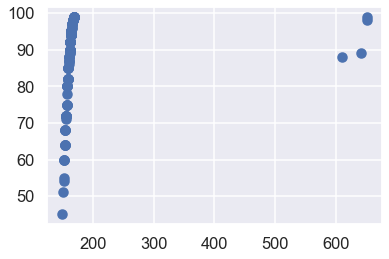

In [136]:
plt.scatter(df['GRE Verbal1'],df['GRE Verbal Percentile1'])

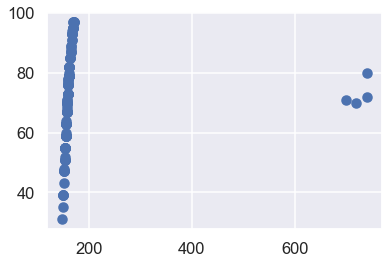

In [137]:
plt.scatter(df['GRE Quantitative1'],df['GRE Quantitative Percentile1'])

In [145]:
# Firstly, differernt GRE tests are taken (old GRE and new GRE),
# therefore the score is not comparable and we need to transfer the score

In [150]:
# I filled the missing value with the mean value of the percentile
df['GRE Quantitative Percentile1'].fillna(df['GRE Quantitative Percentile1'].mean(skipna=True),inplace=True)
df['GRE Verbal Percentile1'].fillna(df['GRE Verbal Percentile1'].mean(skipna=True),inplace=True)

In [154]:
# Transfer the old score (200-800) to new score (130-170)
df.loc[df['GRE Quantitative1']>170,'GRE Quantitative1']=((df.loc[df['GRE Quantitative1']>170,'GRE Quantitative1']-200)/800)*40+130
df.loc[df['GRE Verbal1']>170,'GRE Verbal1']=((df.loc[df['GRE Verbal1']>170,'GRE Verbal1']-200)/800)*40+130

In [169]:
df['GRE Quantitative Percentile1']=df['GRE Quantitative Percentile1'].astype(int)
df['GRE Verbal Percentile1']=df['GRE Verbal Percentile1'].astype(int)

## Clean App-Financial-Amount Total

In [155]:
df['App - Financial - Amount Total']=df['App - Financial - Amount Total'].str[1:]

In [156]:
temp=df['App - Financial - Amount Total']
a=np.array(temp)
dat=[]
for i in a:
    if i=='':
        dat.append(0)
    elif ',' in i:
        x=''.join(i.split(','))
        dat.append(int(x))
    else:
        dat.append(int(i))

In [157]:
df['App - Financial - Amount Total']=np.array(dat)

## Clean College GPA Data

In [158]:
# For missing value of GPA, we fill the missing value with the mean GPA
# For the GPA in scale of 100 convert them in scale of 4
df.loc[df['College Degree GPA']>4,'College Degree GPA']=df.loc[df['College Degree GPA']>4,'College Degree GPA']/100*4

In [163]:
df['College Degree GPA'].fillna(df['College Degree GPA'].mean(skipna=True),inplace=True)

In [165]:
df['College Degree GPA']=round(df['College Degree GPA'],2)

## Save the Data

In [177]:
df.to_csv('cleaned_data.csv')